In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("D:/인공지능개론/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [23]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df.drop(columns=['Outcome'], axis=1) #outcome 제거
#데이터 분할
X=df.drop(columns=['BMI'])
y=df['BMI']
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=52)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X=X.values

(614, 7) (614,)
(154, 7) (154,)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,295 (5.06 KB)

 Trainable params: 1,295 (5.06 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 686.7618 - mse: 686.7618 - val_loss: 99.6084 - val_mse: 99.6084
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 72.4897 - mse: 72.4897 - val_loss: 50.6524 - val_mse: 50.6524
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 70.1841 - mse: 70.1841 - val_loss: 46.3630 - val_mse: 46.3630
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 63.3634 - mse: 63.3634 - val_loss: 43.2575 - val_mse: 43.2575
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 67.1359 - mse: 67.1359 - val_loss: 49.1850 - val_mse: 49.1850
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 68.0883 - mse: 68.0883 - val_loss: 61.5852 - val_mse: 61.5852
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.5817 - mse: 61.5817 - val_loss: 37.8584 - val_mse: 37.8584
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 64.7128 - mse: 64.7128 - val_loss: 35.4775 - val_mse: 35.4775
Epoch 9/10
18/18 ━━━━━━━━━━━━━

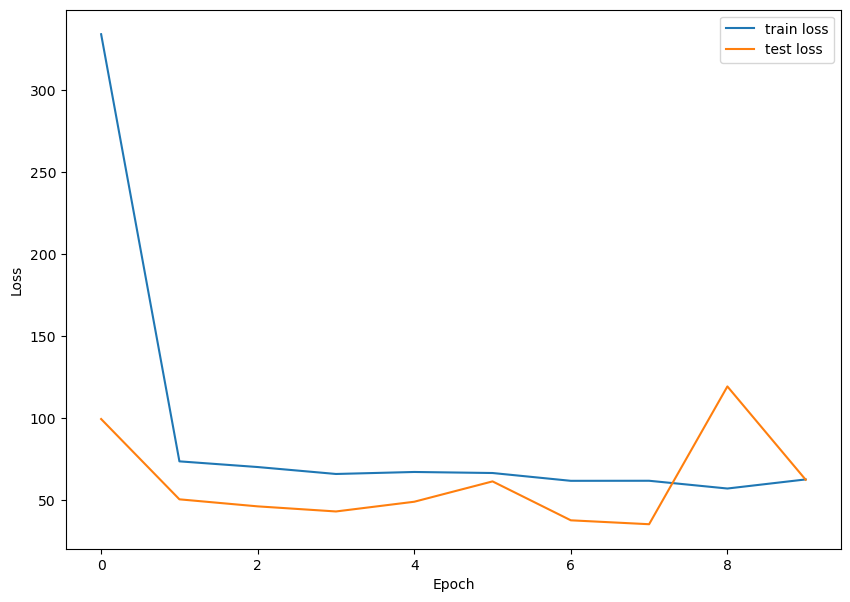

In [33]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 68.9681 - mse: 68.9681


[72.81473541259766, 72.81473541259766]